In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import scipy.stats as stats
from scipy.stats import pearsonr
import random
import datetime
import scipy
import math
import os

from params import question_title_map, bot_detection_title_map, ideology_group_title_map
from utils import savefig, get_datetime_str

In [101]:
df_condition = pd.read_csv("data/condition.csv")
for col in ["bot_ideology", "bot_answer", "ideology_distance"]:
    df_condition[col] = df_condition[col].apply(literal_eval)
df_condition.set_index("participantId", inplace=True)
df_condition.head(5)

,ideology_all_zeros,idx_of_question,who_answers_first,bot_detection,ideology,bot_ideology,ideology_distance,answer,bot_answer,answer_distance,condition,affection_competence,affection_warmth
participantId,,,,,,,,,,,,,
000D1F259F974E9682C4EBD24445552A,False,3,1,True,2.0,"[0.0, 0.0]","[2, 2]",3.0,"[1.5239137251037924, -2.2284343440759713]",5.650137,1,NaN,NaN
000D1F259F974E9682C4EBD24445552A,False,0,0,True,2.0,[0.0],[2],3.0,[-2.8],5.800000,1,NaN,NaN
000D1F259F974E9682C4EBD24445552A,False,4,0,True,2.0,[0.0],[2],1.0,[-1.7],2.700000,1,NaN,NaN
000D1F259F974E9682C4EBD24445552A,False,2,1,True,2.0,"[0.0, 0.0]","[2, 2]",2.0,"[0.2750816069251627, 2.904114762039784]",0.093162,1,NaN,NaN
000D1F259F974E9682C4EBD24445552A,False,1,2,True,2.0,[0.0],[2],1.1,[0.9],0.200000,1,NaN,NaN


In [102]:
df_condition_dropped = df_condition.drop(["affection_competence", "affection_warmth"], axis=1)
df_pair = df_condition_dropped.explode(['bot_answer', 'bot_ideology', "ideology_distance"])
for col in ["bot_ideology", "bot_answer"]:
    df_pair[col] = df_pair[col].astype(float)
df_pair.head()

,ideology_all_zeros,idx_of_question,who_answers_first,bot_detection,ideology,bot_ideology,ideology_distance,answer,bot_answer,answer_distance,condition
participantId,,,,,,,,,,,
000D1F259F974E9682C4EBD24445552A,False,3,1,True,2.0,0.0,2,3.0,1.523914,5.650137,1
000D1F259F974E9682C4EBD24445552A,False,3,1,True,2.0,0.0,2,3.0,-2.228434,5.650137,1
000D1F259F974E9682C4EBD24445552A,False,0,0,True,2.0,0.0,2,3.0,-2.800000,5.800000,1
000D1F259F974E9682C4EBD24445552A,False,4,0,True,2.0,0.0,2,1.0,-1.700000,2.700000,1
000D1F259F974E9682C4EBD24445552A,False,2,1,True,2.0,0.0,2,2.0,0.275082,0.093162,1


## Calculate answer correlation

In [6]:
def split_pd_series(data, n, split_method="rank",  splits=[]):
    if split_method == "rank":
        ret, splits = pd.qcut(data, q=n, labels=list(range(n)), retbins=True)
        return ret, splits



def get_group_correlation(fig, ax, df, participant_ideology_sort="rank", bot_ideology_sort="rank", n=3, color_range=(-1, 1), title="", label="Answer distance", show_scatter=False):
    corr_matrix = np.zeros((n, n))
    df['participant_ideology_group'], participant_ideology_splits = split_pd_series(df["ideology"], n=n, split_method=participant_ideology_sort)
    
    if show_scatter:
        fig_, axes_ = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
    
    for participant_ideology_group in range(n):
        df_participant_ideology_grouped = df.loc[df['participant_ideology_group'] == participant_ideology_group]
        df_participant_ideology_grouped['bot_ideology_group'], bot_ideology_splits = split_pd_series(df_participant_ideology_grouped['bot_ideology'], n=n, split_method=bot_ideology_sort)
        
        for bot_ideology_group in (range(n)):
            df_both_ideology_grouped = df_participant_ideology_grouped.loc[df_participant_ideology_grouped['bot_ideology_group'] == bot_ideology_group]
            try:
                # corr_matrix[participant_ideology_group][n - 1 - bot_ideology_group] = df_both_ideology_grouped['answer_distance'].mean()
                corr_matrix[participant_ideology_group][n - 1 - bot_ideology_group] = pearsonr(df_both_ideology_grouped['answer'], df_both_ideology_grouped['bot_answer'])[0]
                if show_scatter and (participant_ideology_group, bot_ideology_group) in [(0, 2), (2, 0)]:
                    idx = 0 if participant_ideology_group == 0 else 1
                    axes_[idx].scatter(df_both_ideology_grouped['answer'], df_both_ideology_grouped['bot_answer'])
                    axes_[idx].set(
                        xlabel="Participant's opinion",
                        ylabel="Bot's opinion",
                        title=f"Participant of ideology group {participant_ideology_group}, bot of group {bot_ideology_group}"
                    )

            except Exception as e:
                print(e)
                corr_matrix[participant_ideology_group][n - 1 - bot_ideology_group] = 0.0
    
    if show_scatter:
        savefig(fig_, f"visualization/{get_datetime_str()}-correlation-scatter.pdf")

    cax = ax.imshow(corr_matrix.T, cmap="Blues", vmin=color_range[0], vmax=color_range[1])
    cbar = fig.colorbar(cax, label=label, fraction=0.015)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    xticks = []
    xticklabels = []
    for i in range(n + 1):
        xticks.append(-0.5 + i)
        if i != n:
            xticklabels.append(participant_ideology_splits[i])
        else:
            xticklabels.append(2.0)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.xaxis.set_tick_params(length=0)

    for spine in ax.spines.values():
        spine.set_visible(False)

    for i in range(n):
        for j in range(n):
            ax.text(j, i, f"{corr_matrix[j, i]:.2f}", ha='center', va='center', color='black' if corr_matrix[j, i] < 0.5 * (color_range[0] + color_range[1]) else 'white')
    ax.set_title(title, y=1.04)
    arrow_length = 1.5
    ax.arrow(0, 2.65, arrow_length, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
    ax.annotate("Participant is more conservative", xy=(0, 2.83))
    ax.arrow(-0.65, 1.95, 0, -arrow_length, head_width=0.05, head_length=0.1, fc='black', ec='black')
    ax.annotate("Bot is more conservative", xy=(-0.83, 1.9), rotation=90)

### 1. For each question, calculate answer correlation for each ideology group, differing whether participant answers first

In [ ]:
n = 3
corr_fig, corr_axes = plt.subplots(figsize=(12, 28), nrows=7, ncols=2)

for row, question in enumerate(["all", 0, 1, 2, 3, 4, 5]):
    corr_matrixes = [np.zeros((n, n)), np.zeros((n, n))]
    p_matrixes = [np.zeros((n, n)), np.zeros((n, n))]
    data_first = df_pair.loc[(df_pair['condition'] != 1) & (df_pair['who_answers_first'] == 1) & (~df_pair['ideology_all_zeros'])]
    data_not_first = df_pair.loc[(df_pair['condition'] == 2) & (df_pair['who_answers_first'] != 1) & (~df_pair['ideology_all_zeros'])]

    if question != "all":
        data_first = data_first.loc[data_first["idx_of_question"] == question]
        data_not_first = data_not_first.loc[data_not_first["idx_of_question"] == question]

    data_first.loc[:, 'participant_ideology_group'], _ = split_pd_series(data_first.loc[:, "ideology"], n=n, split_method="rank")
    data_not_first.loc[:, 'participant_ideology_group'], _ = split_pd_series(data_not_first.loc[:, "ideology"], n=n, split_method="rank")

    for participant_ideology_group in range(n):
        data_first_grouped = data_first.loc[data_first['participant_ideology_group'] == participant_ideology_group]
        data_not_first_grouped = data_not_first.loc[data_not_first['participant_ideology_group'] == participant_ideology_group]
        data_first_grouped.loc[:,  'bot_ideology_group'], _ = split_pd_series(data_first_grouped.loc[:, 'bot_ideology'], n=n, split_method="rank")
        data_not_first_grouped.loc[:, 'bot_ideology_group'], _ = split_pd_series(data_not_first_grouped.loc[:, 'bot_ideology'], n=n, split_method="rank")

        for bot_ideology_group in (range(n)):
            data_first_both_grouped = data_first_grouped.loc[data_first_grouped['bot_ideology_group'] == bot_ideology_group]
            data_not_first_both_grouped = data_not_first_grouped.loc[data_not_first_grouped['bot_ideology_group'] == bot_ideology_group]
            
            corr_matrixes[0][participant_ideology_group][n - 1 - bot_ideology_group], p_matrixes[0][participant_ideology_group][n - 1 - bot_ideology_group] = pearsonr(data_first_both_grouped['answer'], data_first_both_grouped['bot_answer'])
            corr_matrixes[1][participant_ideology_group][n - 1 - bot_ideology_group], p_matrixes[1][participant_ideology_group][n - 1 - bot_ideology_group] = pearsonr(data_not_first_both_grouped['answer'], data_not_first_both_grouped['bot_answer'])
            
    for col in range(2):
        corr_ax = corr_axes[row][col]
        cax = corr_ax.imshow(corr_matrixes[col].T, cmap="Blues", vmin=-0.5, vmax=0.5)
        cbar = corr_fig.colorbar(cax, label="Correlation of answers", fraction=0.015)
        corr_ax.xaxis.set_visible(False)
        corr_ax.yaxis.set_visible(False)
        for i in range(n):
            for j in range(n):
                corr_ax.text(j, i - 0.1, f"{corr_matrixes[col][j, i]:.2f}", ha='center', va='center', color='black' if corr_matrixes[col][j, i] < 0.5 * (-0.5 + 0.5) else 'white')
                corr_ax.text(j, i + 0.1, f"p={p_matrixes[col][j, i]:.1e}", ha='center', va='center', color='black' if corr_matrixes[col][j, i] < 0.5 * (-0.5 + 0.5) else 'white')
        arrow_length = 1.5
        corr_ax.arrow(0, 2.65, arrow_length, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
        corr_ax.annotate("Participant is more conservative", xy=(0, 2.83))
        corr_ax.arrow(-0.65, 1.95, 0, -arrow_length, head_width=0.05, head_length=0.1, fc='black', ec='black')
        corr_ax.annotate("Bot is more conservative", xy=(-0.83, 1.9), rotation=90)
        for spine in corr_ax.spines.values():
            spine.set_visible(False)
        if col == 0:
            corr_ax.set(title=f"{question_title_map[question]}\nCondition 2 & 3, participant answers first")
        else:
            corr_ax.set(title=f"{question_title_map[question]}\nCondition 2, bot answers first")

savefig(corr_fig, f"visualization/{get_datetime_str()}-correlation-answers_first_or_not.pdf")

### 2. For each question, plot the scatter of participant's answer and bot's answer for each ideology group of participants

In [ ]:
folder_path = f"visualization/{get_datetime_str()}-answer_scatter"
os.makedirs(folder_path, exist_ok=True)

for question in ["all", 0, 1, 2, 3, 4, 5]:
    fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
    fig.suptitle(question_title_map[question])
    data = [
        df_pair.loc[(df_pair["condition"] != 1) & (df_pair["who_answers_first"] != 1) & ~(df_pair["ideology_all_zeros"])], 
        df_pair.loc[(df_pair["condition"] == 2) & (df_pair["who_answers_first"] == 1) & ~(df_pair["ideology_all_zeros"])]
    ]
    for i in [0, 1]:
        data[i]["participant_ideology_group"], _ = split_pd_series((data[i])["ideology"], 3)
    
    if question != "all":
        for i in range(2):
            data[i] = data[i].loc[data[i]["idx_of_question"] == question]
    
    for row, (participant_ideology_group, bot_ideology_group) in enumerate([(0, 2), (2, 0)]):
        data_participant_ideology_filtered = [None, None]
        data_both_ideology_filtered = [None, None]
        for col in [0, 1]:
            ax = axes[row][col]
            data_participant_ideology_filtered[col] = data[col].loc[data[col]['participant_ideology_group'] == participant_ideology_group]
            data_participant_ideology_filtered[col]['bot_ideology_group'], _ = split_pd_series(data_participant_ideology_filtered[col]['bot_ideology'], n=3)
            data_both_ideology_filtered[col] = data_participant_ideology_filtered[col].loc[data_participant_ideology_filtered[col]["bot_ideology_group"] == bot_ideology_group]
            ax.scatter(x=data_both_ideology_filtered[col]['answer'], y=data_both_ideology_filtered[col]['bot_answer'], alpha=0.7)
            ax.set(
                xlabel="Participant's opinion",
                ylabel="Bot's opinion",
            )
            if col == 0:
                ax.set_title(f"{ideology_group_title_map[participant_ideology_group]} participant and {ideology_group_title_map[bot_ideology_group]} bot\nCondition 2 & 3, participant answers first")
            else:
                ax.set_title(f"{ideology_group_title_map[participant_ideology_group]} participant and {ideology_group_title_map[bot_ideology_group]} bot\nCondition 2, bot answers first")
    savefig(fig, f"{folder_path}/{question}.pdf")

### 3. For each question, compare the answer distance between: (1) Participant answers first (2) Bot answers first

In [ ]:
n = 3

folder_path = f"visualization/{get_datetime_str()}-distance-answers_first_or_not"
os.makedirs(folder_path, exist_ok=True)

for question in ["all", 0, 1, 2, 3, 4, 5]:
    cmp_fig, axes = plt.subplots(figsize=(12, 10), nrows=9, ncols=2)
    cmp_fig.suptitle(question_title_map[question])

    data_first = df_pair.loc[(df_pair['condition'] != 1) & (df_pair['who_answers_first'] == 1) & (~df_pair['ideology_all_zeros'])]
    data_not_first = df_pair.loc[(df_pair['condition'] == 2) & (df_pair['who_answers_first'] != 1) & (~df_pair['ideology_all_zeros'])]

    if question != "all":
        data_first = data_first.loc[data_first["idx_of_question"] == question]
        data_not_first = data_not_first.loc[data_not_first["idx_of_question"] == question]

    data_first.loc[:, 'participant_ideology_group'], _ = split_pd_series(data_first.loc[:, "ideology"], n=n, split_method="rank")
    data_not_first.loc[:, 'participant_ideology_group'], _ = split_pd_series(data_not_first.loc[:, "ideology"], n=n, split_method="rank")

    for participant_ideology_group in range(n):
        data_first_grouped = data_first.loc[data_first['participant_ideology_group'] == participant_ideology_group]
        data_not_first_grouped = data_not_first.loc[data_not_first['participant_ideology_group'] == participant_ideology_group]
        data_first_grouped.loc[:,  'bot_ideology_group'], _ = split_pd_series(data_first_grouped.loc[:, 'bot_ideology'], n=n, split_method="rank")
        data_not_first_grouped.loc[:, 'bot_ideology_group'], _ = split_pd_series(data_not_first_grouped.loc[:, 'bot_ideology'], n=n, split_method="rank")

        for bot_ideology_group in (range(n)):
            data_first_both_grouped = data_first_grouped.loc[data_first_grouped['bot_ideology_group'] == bot_ideology_group]
            data_not_first_both_grouped = data_not_first_grouped.loc[data_not_first_grouped['bot_ideology_group'] == bot_ideology_group]

            # plot scatter
            ax = axes[participant_ideology_group * 3 + bot_ideology_group][0]
            ax.scatter(x = data_first_both_grouped['answer_distance'], y=[0.02] * len(data_first_both_grouped['answer_distance']), color="blue", s=1, alpha=0.7)
            ax.scatter(x = data_not_first_both_grouped['answer_distance'], y=[-0.02] * len(data_not_first_both_grouped['answer_distance']), color="red", s=1, alpha=0.7)
            ax.set(
                ylim=(-0.1, 0.1),
                xlim=(-0.1, 6.1),
                xlabel="Answer distance",
                title=f"{ideology_group_title_map[participant_ideology_group]} participant, {ideology_group_title_map[bot_ideology_group]} bot"
            )
            ax.spines["left"].set_visible(False)
            ax.get_yaxis().set_visible(False) 

            # compare two averages
            cmp_ax = axes[participant_ideology_group * 3 + bot_ideology_group][1]
            cmp_ax.axis("off")
            ha = "right"
            cmp_ax.text(0.5, 0.8, f"Blue average: {data_first_both_grouped['answer_distance'].mean():.2f}, Red average: {data_not_first_both_grouped['answer_distance'].mean():.2f}", ha=ha, va='center')
            t, p = scipy.stats.ttest_ind(data_first_both_grouped['answer_distance'], data_not_first_both_grouped['answer_distance'])
            if t > 0:
                cmp_ax.text(0.5, 0, f"Blue average > Red average, p={p:.1e}", ha=ha, va='center')
            elif t < 0:
                cmp_ax.text(0.5, 0, f"Blue average < Red average, p={p:.1e}", ha=ha, va='center')
            else:
                cmp_ax.text(0.5, 0, f"Blue average = Red average, p={p:.1e}", ha=ha, va='center')
    savefig(cmp_fig, f"{folder_path}/{question}.pdf")

### 4. For each question, plot the scatter of opinion distance for ideology distance in different range groups

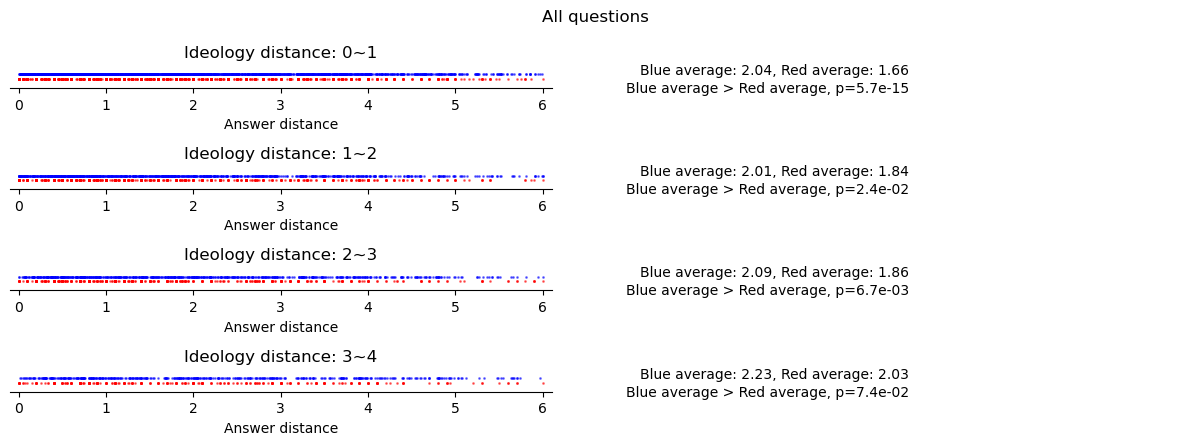

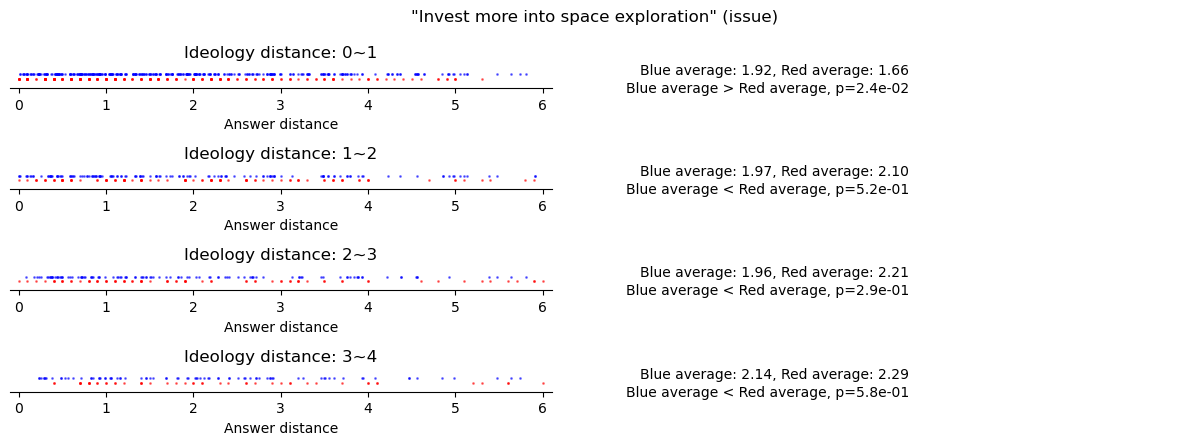

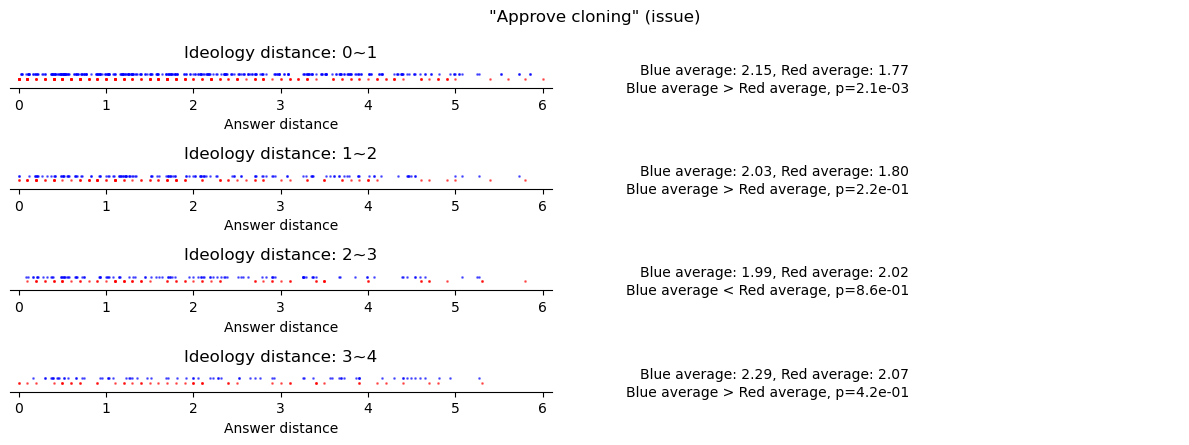

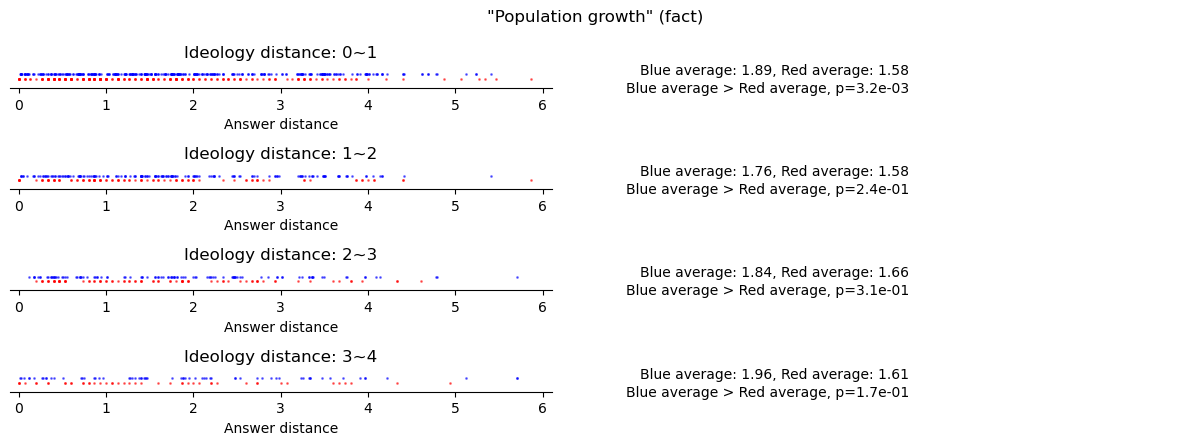

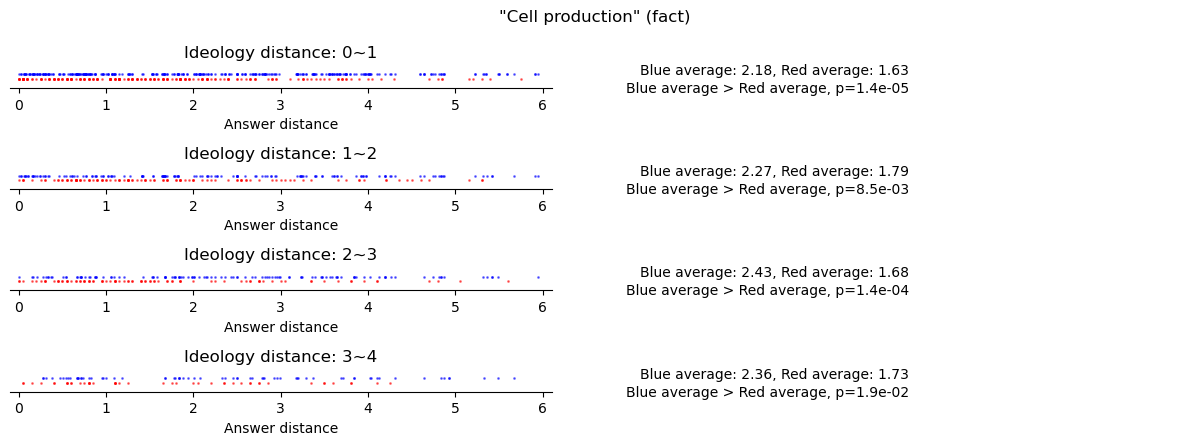

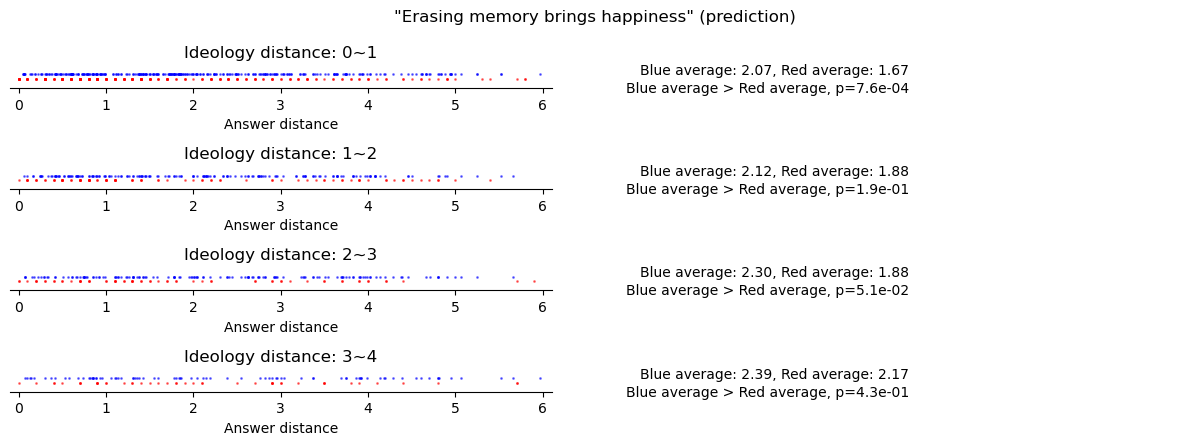

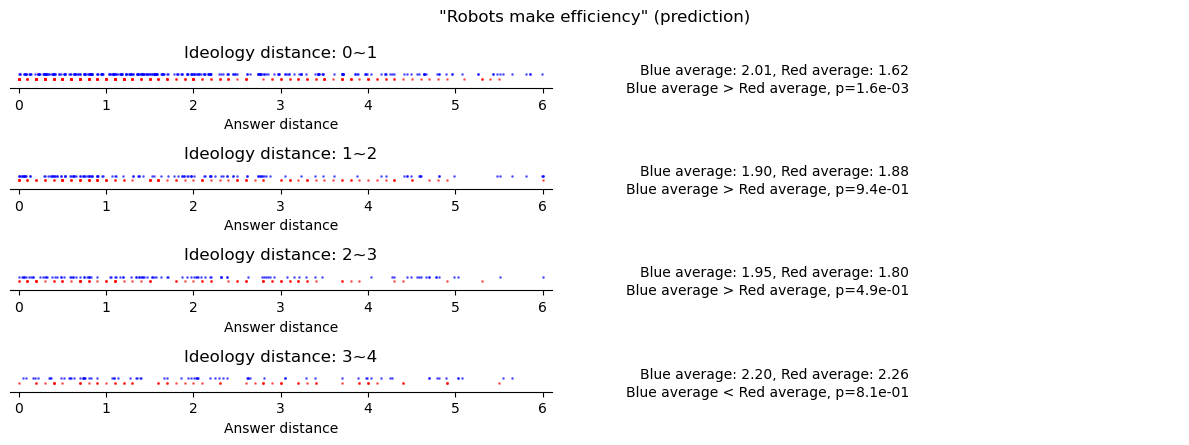

In [104]:
folder_path = f"visualization/{get_datetime_str()}-distance_group_answer_scatter"
os.makedirs(folder_path, exist_ok=True)

data = [
    df_pair.loc[(df_pair["who_answers_first"] == 1) & (df_pair["condition"] != 1)], 
    df_pair.loc[(df_pair["who_answers_first"] != 1) & (df_pair["condition"] == 2)]
]

for question in ["all", 0, 1, 2, 3, 4, 5]:
    fig, axes = plt.subplots(figsize=(12, 4.5), nrows=4, ncols=2)
    fig.suptitle(question_title_map[question])
    for ideology_distance_group in range(4):
        data_filtered = [None, None]
        for i in range(2):
            data_filtered[i] = data[i].loc[(data[i]["ideology_distance"] >= ideology_distance_group) & (data[i]["ideology_distance"] <= ideology_distance_group + 1)]
            if question != "all":
                data_filtered[i] = data_filtered[i].loc[data_filtered[i]["idx_of_question"] == question]

        # plot scatter
        ax = axes[ideology_distance_group][0]
        for i in range(2):
            ax.scatter(
                x=data_filtered[i]['answer_distance'], 
                y=[0.02 if i == 0 else -0.02] * len(data_filtered[i]), 
                color="blue" if i == 0 else "red", 
                s=1,
                alpha=0.5
            )
        ax.set(
            ylim=(-0.1, 0.1),
            xlim=(-0.1, 6.1),
            xlabel="Answer distance",
            title=f"Ideology distance: {ideology_distance_group}~{ideology_distance_group + 1}"
        )
        ax.spines["left"].set_visible(False)
        ax.get_yaxis().set_visible(False) 

        # compare two averages
        cmp_ax = axes[ideology_distance_group][1]
        cmp_ax.axis("off")
        ha = "right"
        cmp_ax.text(0.5, 0.8, f"Blue average: {data_filtered[0]['answer_distance'].mean():.2f}, Red average: {data_filtered[1]['answer_distance'].mean():.2f}", ha=ha, va='center')
        t, p = scipy.stats.ttest_ind(data_filtered[0]['answer_distance'], data_filtered[1]['answer_distance'])
        if t > 0:
            cmp_ax.text(0.5, 0, f"Blue average > Red average, p={p:.1e}", ha=ha, va='center')
        elif t < 0:
            cmp_ax.text(0.5, 0, f"Blue average < Red average, p={p:.1e}", ha=ha, va='center')
        else:
            cmp_ax.text(0.5, 0, f"Blue average = Red average, p={p:.1e}", ha=ha, va='center')
    savefig(fig, f"{folder_path}/{question}.pdf")